# Scale 분석

압연공정에서의 scale불량의 원인을 찾고 개선을 위한 최적의 조건을 도출한다.

### 0. 프로젝트 개요

<span style="font-size:18px"> 1) 현재의 문제점과 필요성 </span> <br> 
<span style="font-size:16px"> ✓ 압연 불량 분류 </span>

<span style="font-size:14px">

- http://news.imaeil.com/page/view/2017051100260542220

- https://www.donga.com/news/Economy/article/all/20170322/83438905/1

- https://www.sedaily.com/NewsView/1OH9UST00A

- 불량품이 나오면 정확히 어느 시점에 왜 결함이 발생했는지 확인하고 이를 바탕으로 스마트 공장이 스스로 순간순간 이런 문제를 제어해 불량 발생을 최소화한다.<br>
- 공정의 자동화를 넘어 공정상 오류를 실시간으로 파악해 문제점을 제거하고 공정을 최적의 상태로 유지하기 위함이다.<br>
- 잘 만들어진 철강 제품이 시간대별로 어떤 압력과 온도 조건을 거쳤는지 0.005초 단위로 컴퓨터에서 확인된다. 만약 불량품이 나올 경우 정확히 어느 시점에 왜 결함이 발생했는지에 대한 결과가 실시간으로 나타난다. 스마트공장은 스스로 이런 문제를 제어하고 제품 불량 발생을 최소화하는 기능을 탑재하고 인간이 놓치는 오류를 잡아내고 있다. 포스코 광양제철소 후판공장에 적용된 스마트공장의 현재 모습이다.<br>
- 데이터 분석 작업은 압연 공정뿐 아니라 후판 공정 전반으로 확대되고 있다. 선박에 쓰이는 후판처럼 고부가가치의 고급강을 만들려면 열간압연을 마친 제품을 물로 급속히 냉각해 강도를 높이는 과정을 거쳐야 한다. 그간 포스코는 냉각을 마친 제품이 좌우로 뒤틀리는 탓에 골머리를 앓았다. 주문자마다 매번 두께와 성분이 다른 제품을 요구하다 보니 문제 원인을 표준화하기도 어려웠다. 하지만 최근 모든 실패 사례를 데이터화하고 분석할 수 있는 시스템을 구축하면서 불량률을 대폭 낮출 수 있게 됐다. 포스코 관계자는 “불량품 재처리 비율이 30% 이상 줄었다”며 “그 덕분에 고급강 생산능력을 더 높일 수 있게 됐다”고 말했다.<br>
- 후판 공장의 생산성은 높이고 불량률을 낮춰 원가절감 효과를 낼 수 있을 것으로 기대한다. 실제 스마트팩토리는 가시적인 성과를 내고 있다. 품질 부적합률은 지난 2015년보다 약 20% 개선됐다. 작업률도 1%포인트 이상 올랐다. 포스코 관계자는 “이미 상당 부분 고도화된 공장에서 작업률을 올리기가 쉽지 않은 것을 고려하면 괄목할 만한 성과”라고 말했다.
</span>

<span style="font-size:18px"> 2) 프로젝트 목적 및 주제 </span>

<span style="font-size:16px"> - 목적 </span>
<p style="font-size:14px"> ① 압연 불량률 파악<br> ② 압연 불량품 영향인자 파악 <br> ③ 압연 불량 분류 <br> <br> </p>
  
<span style="font-size:16px"> - 주제 : 압연 공정에서의 불량품을 실시간으로 분류하는 동시에 공정상의 오류를 파악하여 제거하여 최적의 상태로 유지한다.

<span style="font-size:16px"> ▶ 패키지 불러오기 </span>

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
import graphviz

# plt.rcParams['figure.figsize'] = [8, 5]

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

import matplotlib.font_manager as fm
font_fname = font_fname = "c:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_fname, size=18).get_name()
matplotlib.rc('font',family= fontprop)
matplotlib.rc('axes',unicode_minus=False)

# # "맑은 고딕"을 한글 폰트로 지정
# font_location = "C:/Windows/Fonts/malgunbd.ttf"
# # 폰트이름 가져오기
# font_name = matplotlib.font_manager.FontProperties(fname = font_location).get_name()
# # 지정한 폰트를 기본 폰트로 지정
# matplotlib.rc("font", family = font_name)

<span style="font-size:16px"> ▶ 데이터 불러오기 </span>

### 1. 데이터 이해

<span style="font-size:18px"> 1) 사용한 데이터셋 </span>

In [2]:
ds_scale = pd.read_csv("./SCALE불량.csv", engine = "python", encoding='ansi')
ds_scale.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조


In [3]:
ds_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THICK           720 non-null    float64
 6   PT_WIDTH           720 non-null    int64  
 7   PT_LENGTH          720 non-null    int64  
 8   PT_WEIGHT          720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    object 
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

In [4]:
# 필요하지 않은 컬럼 제거
# PLATE_NO는 ID이므로 분석에서 제외
ds_scale.drop(['PLATE_NO','ROLLING_DATE'],axis=1,inplace=True)

<span style="font-size:18px"> 2) 변수 구성 </span>

<span style="font-size:16px"> ▶ 컬럼 정보 </span><br>
<span style='font-size:14px;color:blue'> - SCALE : Scale불량, 범주형<br> - SPEC : 제품 규격, 범주형<br> - STEEL_KIND : 강종, 범주형</span><br>
<span style='font-size:14px;color:black'> - PT_THICK : Plate 두께, 연속형<br> - PT_WIDTH : Plate 폭, 연속형<br> - PT_LENGTH : Plate 길이, 연속형<br> - PT_WEIGHT : Plate 중량, 연속형</span><br>
<span style='font-size:14px;color:blue'>- FUR_NO : 가열로 호기, 범주형<br> - FUR_NO_ROW: 가열로 작업순번, 범주형</span><br>
<span style='font-size:14px;color:black>'>- FUR_HZ_TEMP: 가열로 가열대 온도(℃), 연속형<br>- FUR_HZ_TIME : 가열로 가열대 시간(분), 연속형<br>- FUR_SZ_TEMP : 가열로 균열대 온도(℃), 연속형<br>- FUR_SZ_TIME : 가열로 균열대 시간(분), 연속형<br>- FUR_TIME : 가열로 시간(분), 연속형<br>- FUR_EXTEMP : 추출온도(℃), 연속형<br>- ROLLING_TEMP_T5 : 압연온도(℃), 연속형</span><br>
<span style='font-size:14px;color:blue'>- HSB : HSB적용(1-적용,0-미적용), 범주형</span><br>
<span style='font-size:14px;color:black'>- ROLLING_DESCALING : 압연 중 Descaling 횟수, 연속형</span><br>
<span style='font-size:14px;color:blue'>- WORK_GR : 작업조, 범주형</span><br>

<span style="font-size:16px"> ▶ 영향 변수 조사 </span> <br>
<span style="font-size:14px"> • 출처 <br> - https://www.reseat.or.kr/portal/bbs/B0000261/view.do?nttId=181381&menuNo=200019&optn18=&searchCnd=1&searchWrd=%EC%A0%9C%EC%A1%B0%EC%86%90%EC%8B%A4%EC%9D%98+%EC%A0%80%EA%B0%90%EC%9D%84+%EC%9C%84%ED%95%9C+%EA%B0%95%ED%8C%90%EC%A0%9C%EC%A1%B0%EA%B8%B0%EC%88%A0%EC%9D%98+%ED%98%84%EC%83%81%EA%B3%BC+%EC%A0%84%EB%A7%9D&pageIndex=1 <br> - https://patents.google.com/patent/KR100353283B1/ko <br> - https://patents.google.com/patent/KR100353283B1/ko <br> - https://koreascience.kr/article/CFKO200832356634557.pdf <br><br> → 조사에 따르면, 제품 규격(SPEC) 및 강판의 스펙(PT_)에 따라 압연공정 중 scale 불량 발생에 영향을 미칠 수 있음. <br> 강판 제품 규격과 압연공정이 표면 품질에 영향을 미치는 것은 맞지만, 스케일 발생과 직접적인 관련이 있는 것은 아닌 경우가 더 많음. 즉, 제품 규격으로 발생한 다른 요인에 의해 스케일 불량이 발생하는 것이 맞음.[관계성 있음] <br> 1. 두께: 강판두께가 더 얇으면 스케일 불량 발생이 더 적은 경향이 있음. 두께가 얇을수록 열전도율이 높아 압연 후 냉각 시간이 짧아지기 때문. [관계성 있음] <br> 2. 폭: 강판 폭이 넓을수록 열이 더 많이 분산되어 압연 후 냉각 시간이 길어지므로, 스케일 불량 발생 가능성이 높아짐.[관계성 있음] <br> 3. 길이: 강판의 길이가 길수록 압연하는 동안 열이 분산되는 시간이 더 길어지므로, 냉각 시간이 길어져 스케일 불량 발생 가능성이 높아짐.[관계성 있음] <br> 4. 중량: 강판의 중량이 많을수록 냉각 시간이 길어져 스케일 불량 발생 가능성이 높아짐.[관계성 있음] <br> <br> → 강종(STEEL_KIND)은 철과 탄소를 합금해 만든 강철로, 보통 SAE나 AISI 등의 국제적 강종 분류 체계를 따르고, 제조 및 가공 공정에서 적합한 강종을 선택해서 사용함.[관계성 있음] <br> → 온도와 관련된 변수는 강판과 스케일의 관계성 입증에서 언급되었으므로 생략함.[관계성 있음] <br> → 1차 scale 제거여부(HSB), 압연 중 Descaling 횟수(ROLLING_DESCALING)는 알려진 정보가 많지 않아, EDA를 통해 확인하기로 함.  </span>

<span style="font-size:18px"> 3) 데이터 확인 </span> <br>

<span style="font-size:16px"> ▶ 히스토그램 </span>

Text(0.5, 147.7222222222222, 'ROLLING_DESCALING')

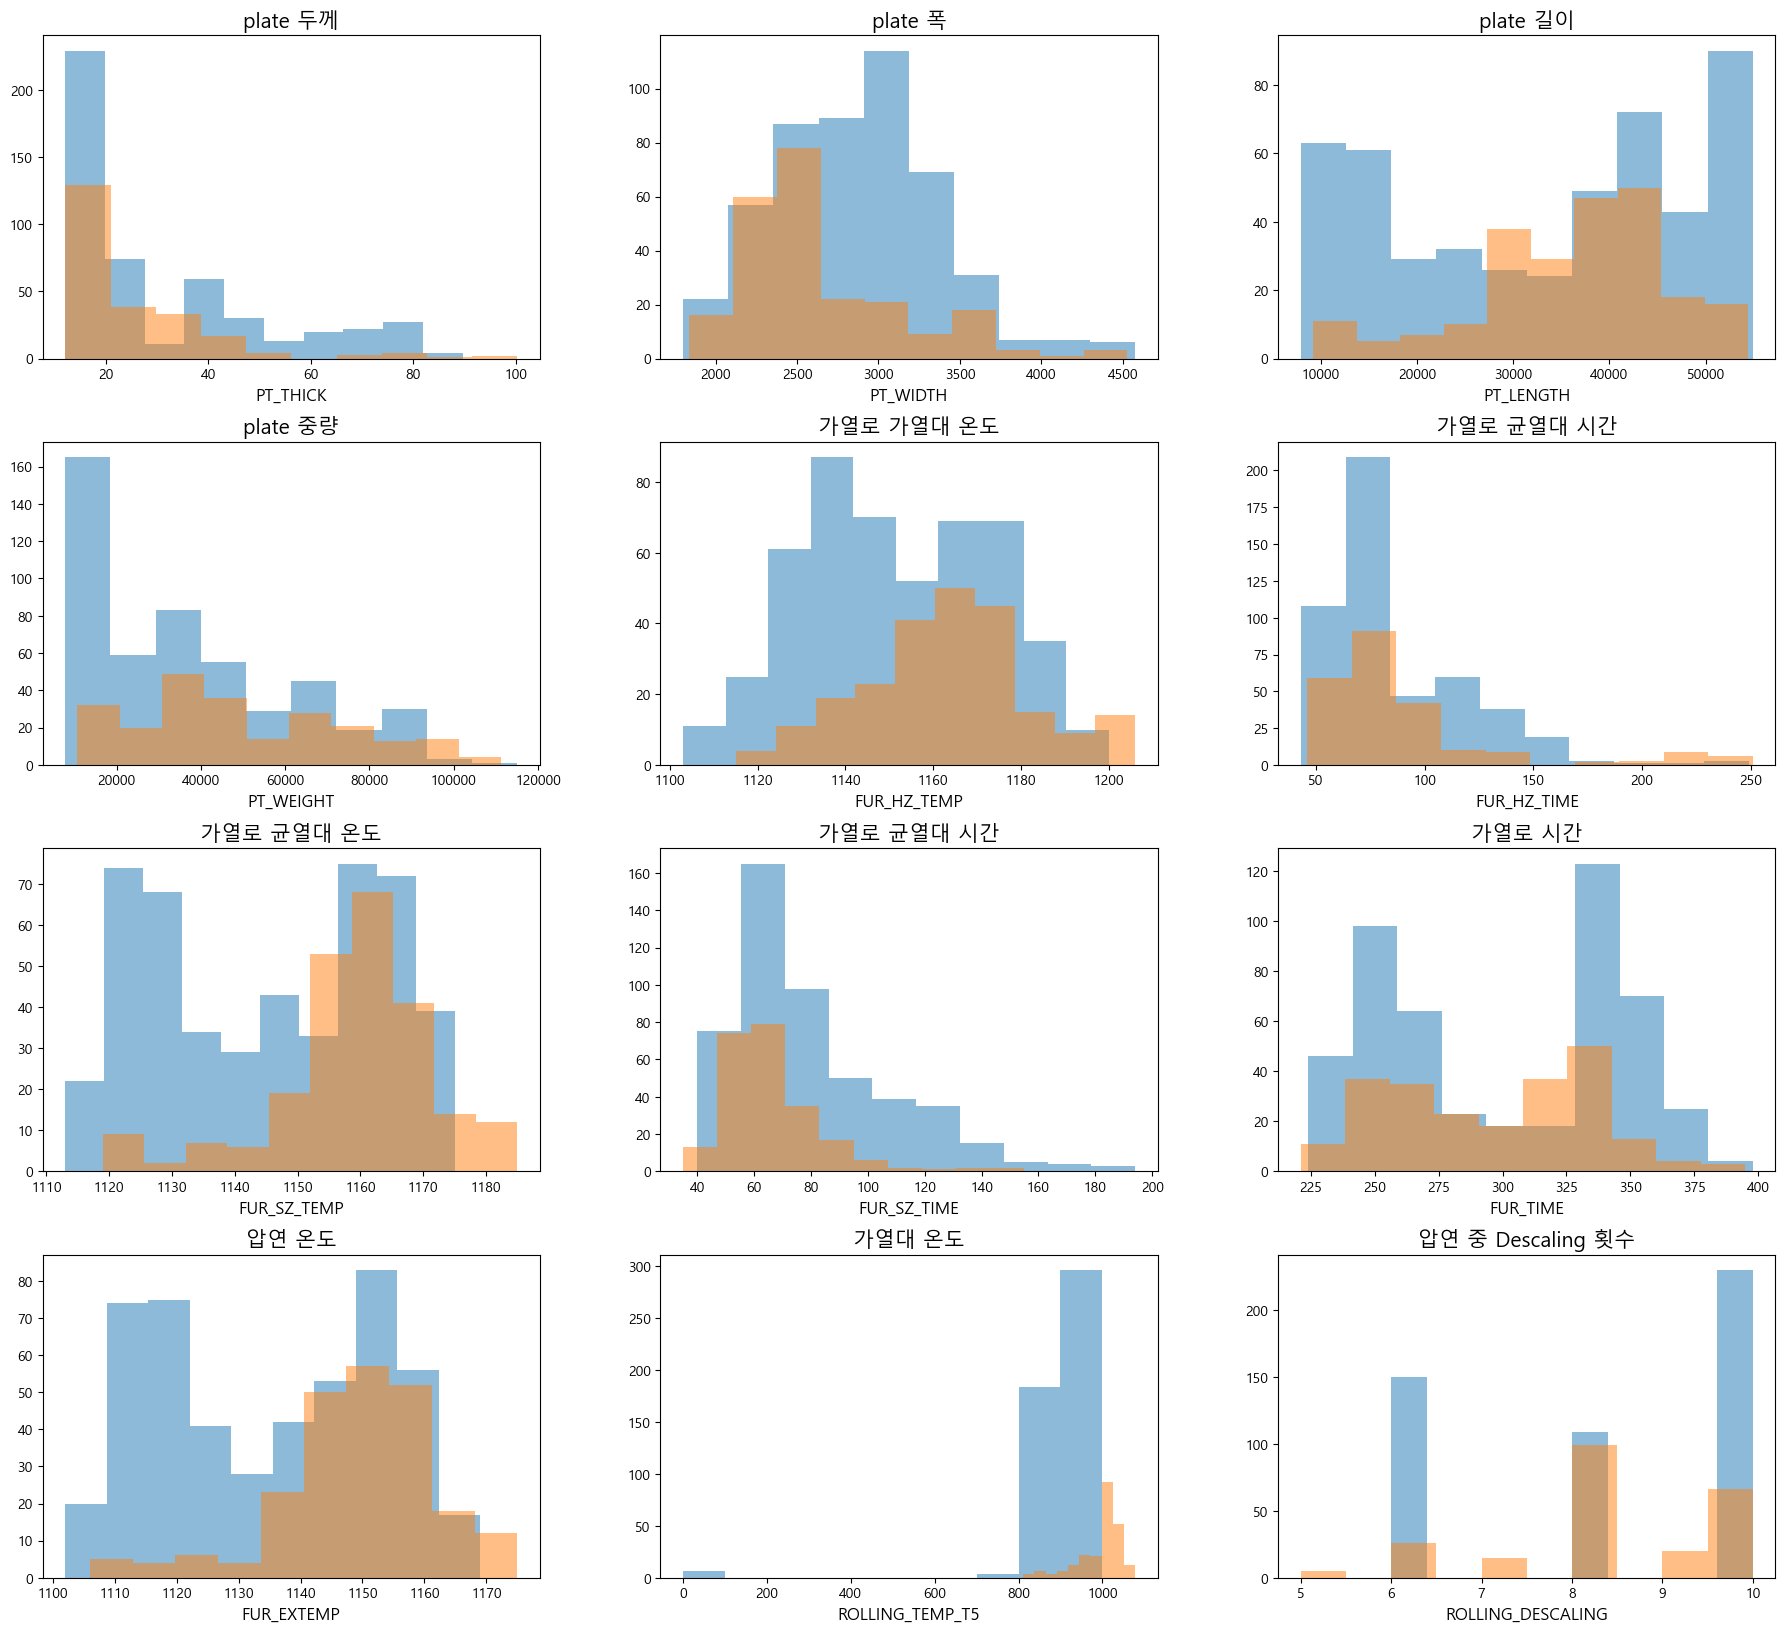

In [5]:
df = ds_scale.copy()
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18,16))
plt.tight_layout(w_pad=6, h_pad=4)

axes[0,0].hist(df[df["SCALE"] == "양품"]["PT_THICK"], label = "양품", alpha = 0.5)
axes[0,0].hist(df[df["SCALE"] == "불량"]["PT_THICK"], label = "불량", alpha = 0.5)
axes[0,0].set_title("plate 두께",fontsize=15)
axes[0,0].set_xlabel("PT_THICK", fontsize=12)

axes[0,1].hist(df[df["SCALE"] == "양품"]["PT_WIDTH"], label = "양품", alpha = 0.5)
axes[0,1].hist(df[df["SCALE"] == "불량"]["PT_WIDTH"], label = "불량", alpha = 0.5)
axes[0,1].set_title("plate 폭",fontsize=15)
axes[0,1].set_xlabel("PT_WIDTH", fontsize=12)

axes[0,2].hist(df[df["SCALE"] == "양품"]["PT_LENGTH"], label = "양품", alpha = 0.5)
axes[0,2].hist(df[df["SCALE"] == "불량"]["PT_LENGTH"], label = "불량", alpha = 0.5)
axes[0,2].set_title("plate 길이",fontsize=15)
axes[0,2].set_xlabel("PT_LENGTH", fontsize=12)

axes[1,0].hist(df[df["SCALE"] == "양품"]["PT_WEIGHT"], label = "양품", alpha = 0.5)
axes[1,0].hist(df[df["SCALE"] == "불량"]["PT_WEIGHT"], label = "불량", alpha = 0.5)
axes[1,0].set_title("plate 중량",fontsize=15)
axes[1,0].set_xlabel("PT_WEIGHT", fontsize=12)

axes[1,1].hist(df[df["SCALE"] == "양품"]["FUR_HZ_TEMP"], label = "양품", alpha = 0.5)
axes[1,1].hist(df[df["SCALE"] == "불량"]["FUR_HZ_TEMP"], label = "불량", alpha = 0.5)
axes[1,1].set_title("가열로 가열대 온도",fontsize=15)
axes[1,1].set_xlabel("FUR_HZ_TEMP", fontsize=12)

axes[1,2].hist(df[df["SCALE"] == "양품"]["FUR_HZ_TIME"], label = "양품", alpha = 0.5)
axes[1,2].hist(df[df["SCALE"] == "불량"]["FUR_HZ_TIME"], label = "불량", alpha = 0.5)
axes[1,2].set_title("가열로 균열대 시간",fontsize=15)
axes[1,2].set_xlabel("FUR_HZ_TIME", fontsize=12)

axes[2,0].hist(df[df["SCALE"] == "양품"]["FUR_SZ_TEMP"], label = "양품", alpha = 0.5)
axes[2,0].hist(df[df["SCALE"] == "불량"]["FUR_SZ_TEMP"], label = "불량", alpha = 0.5)
axes[2,0].set_title("가열로 균열대 온도",fontsize=15)
axes[2,0].set_xlabel("FUR_SZ_TEMP", fontsize=12)

axes[2,1].hist(df[df["SCALE"] == "양품"]["FUR_SZ_TIME"], label = "양품", alpha = 0.5)
axes[2,1].hist(df[df["SCALE"] == "불량"]["FUR_SZ_TIME"], label = "불량", alpha = 0.5)
axes[2,1].set_title("가열로 균열대 시간",fontsize=15)
axes[2,1].set_xlabel("FUR_SZ_TIME", fontsize=12)

axes[2,2].hist(df[df["SCALE"] == "양품"]["FUR_TIME"], label = "양품", alpha = 0.5)
axes[2,2].hist(df[df["SCALE"] == "불량"]["FUR_TIME"], label = "불량", alpha = 0.5)
axes[2,2].set_title("가열로 시간",fontsize=15)
axes[2,2].set_xlabel("FUR_TIME", fontsize=12)

axes[3,0].hist(df[df["SCALE"] == "양품"]["FUR_EXTEMP"], label = "양품", alpha = 0.5)
axes[3,0].hist(df[df["SCALE"] == "불량"]["FUR_EXTEMP"], label = "불량", alpha = 0.5)
axes[3,0].set_title("압연 온도",fontsize=15)
axes[3,0].set_xlabel("FUR_EXTEMP", fontsize=12)

axes[3,1].hist(df[df["SCALE"] == "양품"]["ROLLING_TEMP_T5"], label = "양품", alpha = 0.5)
axes[3,1].hist(df[df["SCALE"] == "불량"]["ROLLING_TEMP_T5"], label = "불량", alpha = 0.5)
axes[3,1].set_title("가열대 온도",fontsize=15)
axes[3,1].set_xlabel("ROLLING_TEMP_T5", fontsize=12)

axes[3,2].hist(df[df["SCALE"] == "양품"]["ROLLING_DESCALING"], label = "양품", alpha = 0.5)
axes[3,2].hist(df[df["SCALE"] == "불량"]["ROLLING_DESCALING"], label = "불량", alpha = 0.5)
axes[3,2].set_title("압연 중 Descaling 횟수",fontsize=15)
axes[3,2].set_xlabel("ROLLING_DESCALING", fontsize=12)

<span style="font-size:16px"> ▶ 범주형 확인 </span>

In [6]:
df_obj = ds_scale.select_dtypes(include='object')
df_obj.head()

,SCALE,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,양품,AB/EH32-TM,T1,1호기,1열,적용,2조
1,양품,AB/EH32-TM,T1,1호기,2열,적용,2조
2,양품,NV-E36-TM,T8,2호기,1열,적용,3조
3,양품,NV-E36-TM,T8,2호기,2열,적용,3조
4,양품,BV-EH36-TM,T8,3호기,1열,적용,1조


In [7]:
#Scale불량
df_obj['SCALE'].value_counts() # 양품은 0, 불량은 1로 변경 필요 // 데이터 불균형 있음.

양품    489
불량    231
Name: SCALE, dtype: int64

In [8]:
# 제품 규격
df_obj['SPEC'].value_counts() # 66개 -> labelencoder

JS-SM490YB    84
LR-A          54
NV-A          48
PILAC-BT33    40
BV-EH36-TM    35
              ..
KR-B           1
BV-A           1
CCS-B          1
KS-HSB600      1
BV-AH36-TM     1
Name: SPEC, Length: 66, dtype: int64

In [9]:
# 강종
df_obj['STEEL_KIND'].value_counts() # labelencoder

C0    503
T8     95
T5     43
T7     35
T1     18
T0     16
C3      7
T3      2
C1      1
Name: STEEL_KIND, dtype: int64

<span style="font-size:14px"> • Data preprocessing에서 강종의 강도구분에 따라 중/중고/고강도로 구분하는 파생변수 추가 <br> &nbsp; - C0, C1 : 중강도 <br> &nbsp; - T1, T8, C3, T3 : 고강도 <br> &nbsp; - T5, T7, T0 : 중고강도</span>

In [10]:
# 가열로 호기(1, 2, 3호기)
df_obj['FUR_NO'].value_counts() # labelencoder

3호기    243
1호기    240
2호기    237
Name: FUR_NO, dtype: int64

In [11]:
# 가열로 장입열(1열, 2열)
df_obj['FUR_NO_ROW'].value_counts() # labelencoder

1열    362
2열    358
Name: FUR_NO_ROW, dtype: int64

In [12]:
# 호기와 열별 데이터 수
df_fur = df_obj.groupby(['FUR_NO','FUR_NO_ROW']).size()
df_fur 

FUR_NO  FUR_NO_ROW
1호기     1열            119
        2열            121
2호기     1열            121
        2열            116
3호기     1열            122
        2열            121
dtype: int64

In [13]:
# HSB적용(1-적용,0-미적용)
df_obj['HSB'].value_counts() 

적용     687
미적용     33
Name: HSB, dtype: int64

In [14]:
# 작업조
df_obj['WORK_GR'].value_counts()

4조    194
1조    189
3조    172
2조    165
Name: WORK_GR, dtype: int64

<span style="font-size:16px"> ▶ 수치형 확인 </span> 

In [15]:
df_num = ds_scale.select_dtypes(exclude='object')
df_num

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707,15109,14180,1144,116,1133,59,282,1125,934,8
1,32.25,3707,15109,14180,1144,122,1135,53,283,1120,937,8
2,33.27,3619,19181,18130,1129,116,1121,55,282,1106,889,8
3,33.27,3619,19181,18130,1152,125,1127,68,316,1113,885,8
4,38.33,3098,13334,12430,1140,134,1128,48,314,1118,873,8
...,...,...,...,...,...,...,...,...,...,...,...,...
715,20.14,3580,38639,21870,1172,72,1164,62,245,1155,1005,8
716,15.08,3212,48233,18340,1150,61,1169,61,238,1160,947,10
717,16.60,3441,43688,19590,1169,65,1163,77,247,1152,948,10
718,15.59,3363,48740,80240,1179,86,1163,45,243,1154,940,10


In [16]:
df_num.describe()

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,29.267857,2807.127778,34323.269444,41481.777778,1155.338889,88.204167,1149.666667,75.330556,300.563889,1139.570833,933.920833,8.319444
std,19.152651,517.839690,13828.434837,24751.322015,20.866398,36.248696,17.571788,26.086390,45.390303,17.857121,107.863887,1.623252
min,12.030000,1800.000000,7893.000000,7820.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1102.000000,0.000000,5.000000
25%,16.090000,2466.000000,22663.000000,17757.500000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1122.750000,889.750000,6.000000
50%,20.130000,2725.000000,37380.000000,36120.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1144.000000,951.000000,8.000000
75%,40.000000,3125.000000,43735.000000,61120.000000,1171.000000,101.000000,1164.000000,85.250000,342.000000,1154.000000,994.250000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,1206.000000,251.000000,1185.000000,194.000000,398.000000,1175.000000,1078.000000,10.000000


<span style="font-size:14px"> • 이상치 확인 </span> 

<AxesSubplot:>

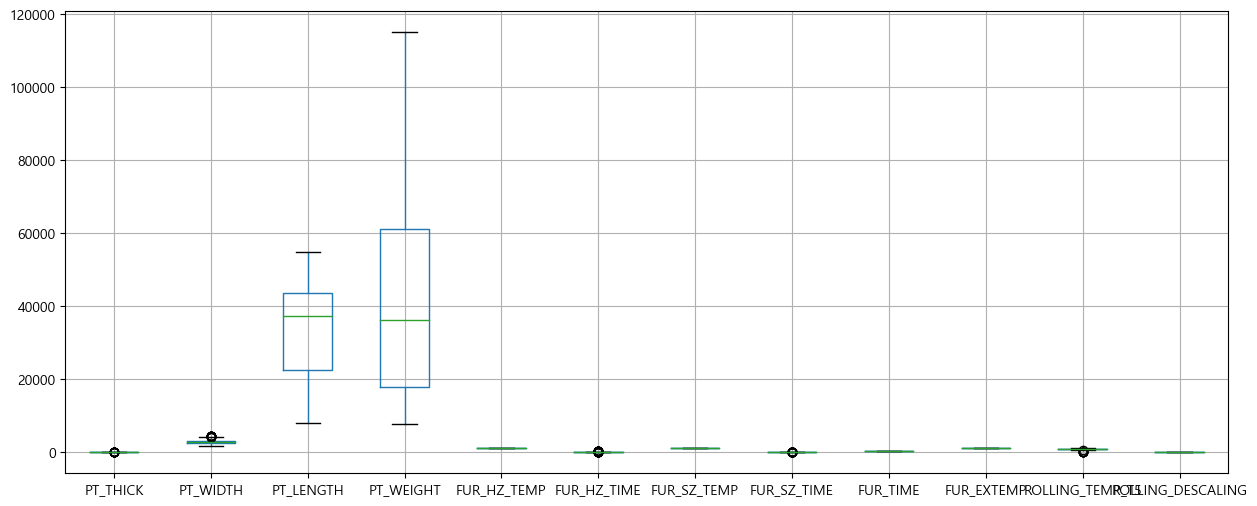

In [17]:
plt.figure(figsize=(15,6))
df_num.boxplot()

<AxesSubplot:>

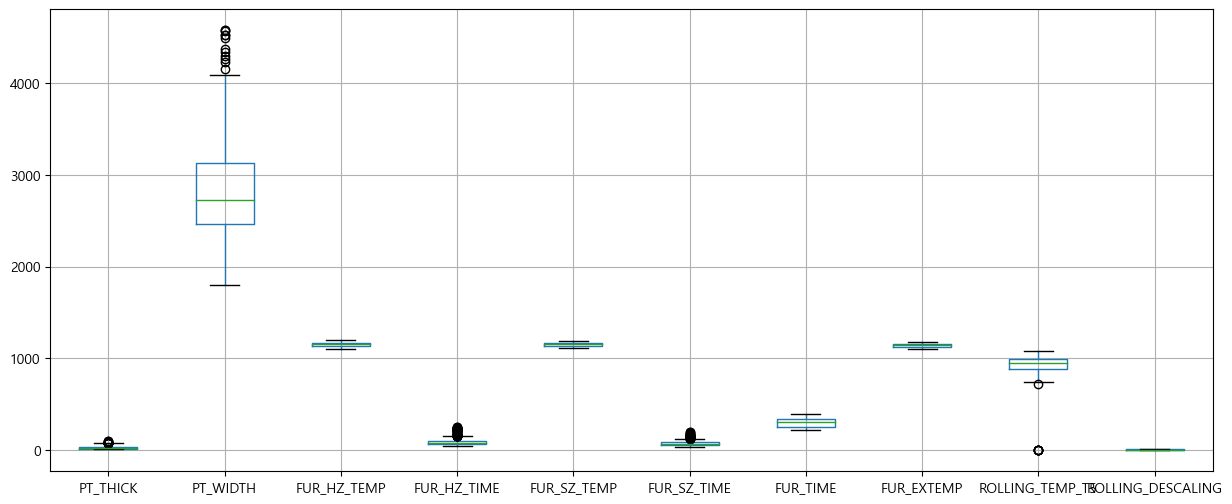

In [18]:
df_num2 = df_num.drop(['PT_LENGTH', 'PT_WEIGHT'],axis=1)
plt.figure(figsize=(15,6))
df_num2.boxplot()

In [19]:
df=ds_scale.copy()

### 2. EDA

<span style="font-size:18px"> 1) FUR_NO, FUR_NO_ROW별 불량률 </span>

In [20]:
df_fur = df.copy() #df, df_fur, ds_scale

In [21]:
df_f=pd.DataFrame(df_fur.groupby(['FUR_NO','FUR_NO_ROW'])['SCALE'].value_counts())
# plt.figure(figsize=(5,3))
# df_f.plot.bar()
# plt.legend()
df_f

SCALE
FUR_NO FUR_NO_ROW SCALE       
1호기    1열         양품        77
                  불량        42
       2열         양품        90
                  불량        31
2호기    1열         양품        86
                  불량        35
       2열         양품        81
                  불량        35
3호기    1열         양품        79
                  불량        43
       2열         양품        76
                  불량        45

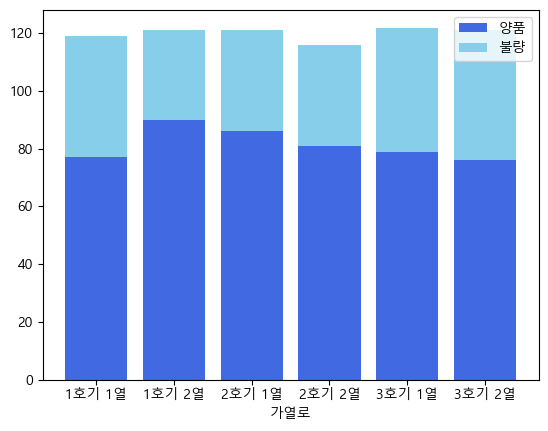

<Figure size 800x800 with 0 Axes>

In [22]:
# create data
x = ['1호기 1열', '1호기 2열', '2호기 1열', '2호기 2열','3호기 1열', '3호기 2열']
y1 = [77, 90, 86, 81,79,76]
y2 = [42, 31, 35, 35,43,45]
 
# plot bars in stack manner
plt.bar(x, y1, color='royalblue',label='양품')
plt.bar(x, y2, bottom=y1, color='skyblue', label='불량')
plt.xlabel('가열로')
plt.legend()
plt.figure(figsize=(8,8))
plt.show()

<span style="font-size:14px"> → 모든 가열로에서 불량이 비등하게 나타남. 가열로 자체에 이상이 있는 것은 아닌 것으로 보인다. </span> 

<span style="font-size:18px"> 2) 강판 폭(PT_WIDTH)와 가열로 추출 온도(FUR_EXTEMP)에 따른 SCALE 불량 분포 확인 </span>

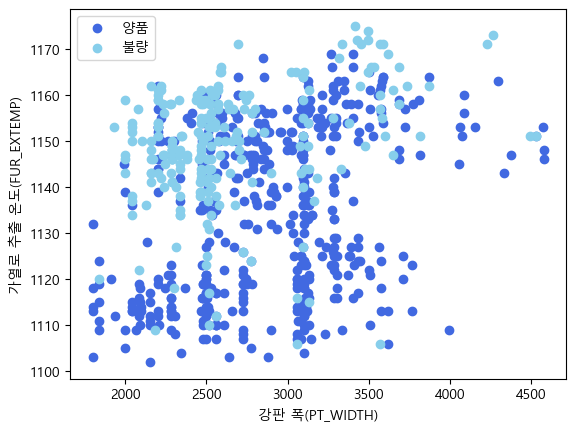

In [23]:
d1= df_fur[df_fur['SCALE']=='양품']
d2 = df_fur[df_fur['SCALE']=='불량']

plt.scatter(d1['PT_WIDTH'],d1['FUR_EXTEMP'],color='royalblue',label='양품')
plt.scatter(d2['PT_WIDTH'],d2['FUR_EXTEMP'],color='skyblue',label='불량')
plt.xlabel('강판 폭(PT_WIDTH)')
plt.ylabel('가열로 추출 온도(FUR_EXTEMP)')
plt.legend()
plt.show()

<span style="font-size:14px"> → 강판의 폭이 2500 근처이고 추출온도는 1140-1160 사이일 때 불량이 가장 많이 발생함. 이 구간에서는 데이터상으로 보기엔 양품이 불량보다 적다. </span> <span style="background:bisque;font-size:14px"> 빠른 문제 해결이 필요 </span> 

<span style="font-size:18px"> 3) 가열로 가열대 온도(FUR_HZ_TEMP)와 가열로 균열대 온도(FUR_SZ_TEMP)에 따른 SCALE 불량 분포 확인 </span>

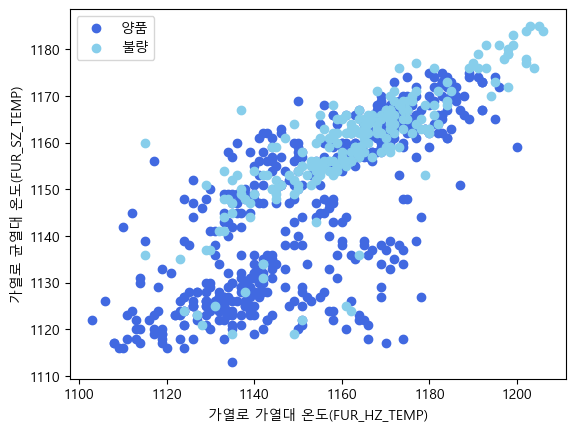

In [24]:
d3= df_fur[df_fur['SCALE']=='양품']
d4 = df_fur[df_fur['SCALE']=='불량']

plt.scatter(d3['FUR_HZ_TEMP'],d3['FUR_SZ_TEMP'],color='royalblue',label='양품')
plt.scatter(d4['FUR_HZ_TEMP'],d4['FUR_SZ_TEMP'],color='skyblue',label='불량')
plt.xlabel('가열로 가열대 온도(FUR_HZ_TEMP)')
plt.ylabel('가열로 균열대 온도(FUR_SZ_TEMP)')
plt.legend()
plt.show()

<span style="font-size:14px"> → 가열대와 균열대 온도가 높아질수록 불량이 많이 발생함. 강판 규격과 성분에 따라 불량 발생 여부 확률은 다르겠지만 해당 온도에서의 더 잦은 모니터링은 요구됨. </span> 

<span style="font-size:16px"> 4) HSB 적용여부를 기준으로 데이터셋을 분리하고 강판 두께(PT_THICK)와 Descaling 횟수(ROLLING_DESCALING)에 따른 SCALE 불량 분포 확인 </span>

In [25]:
#HSB 적용 여부에 따라 데이터셋 분리
d5= df_fur[df_fur['HSB']=='적용']
d6 = df_fur[df_fur['HSB']=='미적용']
d5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 0 to 719
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              687 non-null    object 
 1   SPEC               687 non-null    object 
 2   STEEL_KIND         687 non-null    object 
 3   PT_THICK           687 non-null    float64
 4   PT_WIDTH           687 non-null    int64  
 5   PT_LENGTH          687 non-null    int64  
 6   PT_WEIGHT          687 non-null    int64  
 7   FUR_NO             687 non-null    object 
 8   FUR_NO_ROW         687 non-null    object 
 9   FUR_HZ_TEMP        687 non-null    int64  
 10  FUR_HZ_TIME        687 non-null    int64  
 11  FUR_SZ_TEMP        687 non-null    int64  
 12  FUR_SZ_TIME        687 non-null    int64  
 13  FUR_TIME           687 non-null    int64  
 14  FUR_EXTEMP         687 non-null    int64  
 15  ROLLING_TEMP_T5    687 non-null    int64  
 16  HSB                687 non

In [26]:
d6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 71 to 700
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              33 non-null     object 
 1   SPEC               33 non-null     object 
 2   STEEL_KIND         33 non-null     object 
 3   PT_THICK           33 non-null     float64
 4   PT_WIDTH           33 non-null     int64  
 5   PT_LENGTH          33 non-null     int64  
 6   PT_WEIGHT          33 non-null     int64  
 7   FUR_NO             33 non-null     object 
 8   FUR_NO_ROW         33 non-null     object 
 9   FUR_HZ_TEMP        33 non-null     int64  
 10  FUR_HZ_TIME        33 non-null     int64  
 11  FUR_SZ_TEMP        33 non-null     int64  
 12  FUR_SZ_TIME        33 non-null     int64  
 13  FUR_TIME           33 non-null     int64  
 14  FUR_EXTEMP         33 non-null     int64  
 15  ROLLING_TEMP_T5    33 non-null     int64  
 16  HSB                33 non-

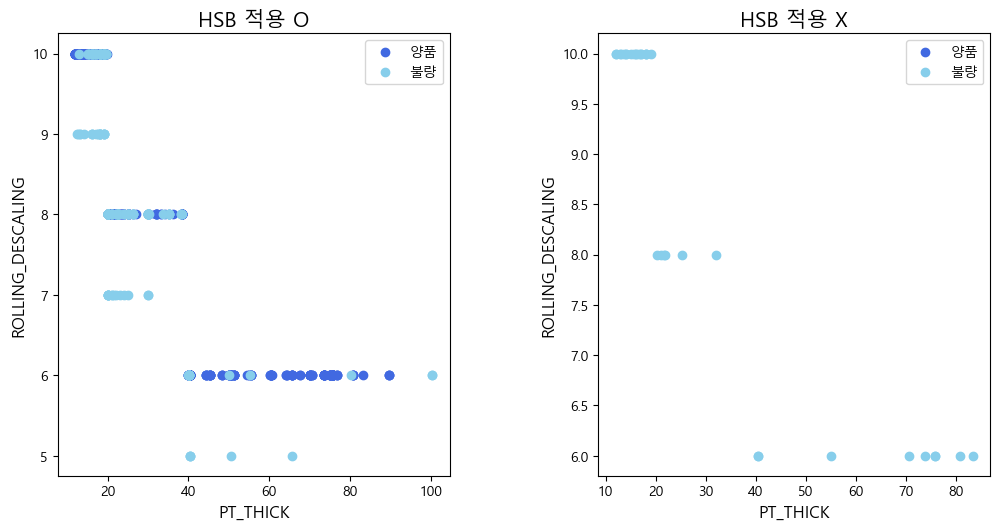

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plt.tight_layout(w_pad=8, h_pad=4)

d7= d5[d5['SCALE']=='양품']
d8 = d5[d5['SCALE']=='불량']

axes[0].scatter(d7['PT_THICK'],d7['ROLLING_DESCALING'],color='royalblue',label='양품')
axes[0].scatter(d8['PT_THICK'],d8['ROLLING_DESCALING'],color='skyblue',label='불량')
axes[0].set_title("HSB 적용 O",fontsize=15)
axes[0].set_xlabel("PT_THICK", fontsize=12)
axes[0].set_ylabel('ROLLING_DESCALING', fontsize=12)
axes[0].legend()

d9= d6[d6['SCALE']=='양품']
d10 = d6[d6['SCALE']=='불량']

axes[1].scatter(d9['PT_THICK'],d9['ROLLING_DESCALING'],color='royalblue',label='양품')
axes[1].scatter(d10['PT_THICK'],d10['ROLLING_DESCALING'],color='skyblue',label='불량')
axes[1].set_title("HSB 적용 X",fontsize=15)
axes[1].set_xlabel("PT_THICK", fontsize=12)
axes[1].set_ylabel('ROLLING_DESCALING', fontsize=12)
axes[1].legend()


<span style="background:bisque;font-size:14px"> → HSB 적용여부가 불량 발생에 큰 영향을 미침.</span> <br> <span style="font-size:14px"> → 강판 두께가 두꺼울 땐 1차 스케일 제거를 6회했을 때 양품이 가장 많이 생산되고, 얇을 때는 스케일 제거를 많이 하여 불량 발생이 많다. </span> 

### 3. 통계적 검정
<span style="font-size:18px"> 1) 정규성 검정 </span> 

<span style="font-size:14px"> • STEP1.가설 수립 <br> &nbsp;- H0: plate(강판) 두께는 정규성을 만족한다. <br> &nbsp; - H1: plate(강판) 두께는 정규성을 만족하지 않는다. <br> -------- <br> • STEP2. 유의수준 설립 <br> &nbsp; - 유의수준(a)은 0.05로 설정한다. <br> -------- <br> • STEP3. 검정 작업_Shapiro </span> 

In [28]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# PT_THICK : 정규성을 만족한다.
data1= df['PT_THICK']
#정규성검정
statistic, p = stats.shapiro(data1)

print("Shapiro-Wilk Test: statistic={0:.4f}, p-value={1:.4f}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.7899, p-value=0.0000


In [29]:
# 나머지 수치형 변수
for i in range(12): 
    data1= df_num.iloc[:,i]
    statistic, p = stats.shapiro(data1)
    print("- {0}".format(df_num.columns[i]))
    print("Shapiro-Wilk Test: statistic={0:.4f}, p-value={1:.4f}".format(statistic,p))

- PT_THICK
Shapiro-Wilk Test: statistic=0.7899, p-value=0.0000
- PT_WIDTH
Shapiro-Wilk Test: statistic=0.9695, p-value=0.0000
- PT_LENGTH
Shapiro-Wilk Test: statistic=0.9355, p-value=0.0000
- PT_WEIGHT
Shapiro-Wilk Test: statistic=0.9118, p-value=0.0000
- FUR_HZ_TEMP
Shapiro-Wilk Test: statistic=0.9879, p-value=0.0000
- FUR_HZ_TIME
Shapiro-Wilk Test: statistic=0.7759, p-value=0.0000
- FUR_SZ_TEMP
Shapiro-Wilk Test: statistic=0.9309, p-value=0.0000
- FUR_SZ_TIME
Shapiro-Wilk Test: statistic=0.8597, p-value=0.0000
- FUR_TIME
Shapiro-Wilk Test: statistic=0.9098, p-value=0.0000
- FUR_EXTEMP
Shapiro-Wilk Test: statistic=0.9392, p-value=0.0000
- ROLLING_TEMP_T5
Shapiro-Wilk Test: statistic=0.6033, p-value=0.0000
- ROLLING_DESCALING
Shapiro-Wilk Test: statistic=0.8027, p-value=0.0000


<span style="font-size:14px"> • STEP4. 결과해석 <br> &nbsp;  - 정규성 검정결과 검정통계량은 0.78이다. <br> &nbsp; - p-value < 0.05 = a이기 때문에 대립가설을 채택하며, 강판 두께는 정규성을 만족하지 않는다. <br> &nbsp;  --------<br> &nbsp;  - 정규성 만족 X : PT_THICK, PT_WIDTH, PT_LENGTH, PT_WEIGHT, FUR_HZ_TEMP, FUR_HZ_TIME, FUR_SZ_TEMP, FUR_SZ_TIME, FUR_TIME, FUR_EXTEMP, ROLLING_TEMP_T5, ROLLING_DESCALING </span>

In [30]:
df_num.head()

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707,15109,14180,1144,116,1133,59,282,1125,934,8
1,32.25,3707,15109,14180,1144,122,1135,53,283,1120,937,8
2,33.27,3619,19181,18130,1129,116,1121,55,282,1106,889,8
3,33.27,3619,19181,18130,1152,125,1127,68,316,1113,885,8
4,38.33,3098,13334,12430,1140,134,1128,48,314,1118,873,8


<span style="font-size:18px"> 2) 가설검정 </span> 

<span style="font-size:14px"> • STEP1.가설 수립 <br> &nbsp; - H0: 가열로호기(FUR_NO)별 평균 가열로 소요 시간(FUR_TIME)은 같다. <br> &nbsp; - H1: 가열로호기(FUR_NO)별 평균 가열로 소요 시간(FUR_TIME)은 다르다.<br> &nbsp; -------- <br> &nbsp; - STEP2. 유의수준 설립 <br> &nbsp; - 유의수준(a)은 0.05로 설정한다. <br> &nbsp;-------- <br> &nbsp; - STEP3. 검정 작업_ANOVA </span>

In [31]:
df1 = df[df['FUR_NO']=='1호기']
df2 = df[df['FUR_NO']=='2호기']
df3 = df[df['FUR_NO']=='3호기']

#shapiro-wilk test
statistic,p=stats.shapiro(df1['FUR_TIME'])
statistic1,p1=stats.shapiro(df2['FUR_TIME'])
statistic2,p2=stats.shapiro(df3['FUR_TIME'])

print("statistic_1={0:.4f},p-value_1={1:.4f}".format(statistic,p))
print("statistic_2={0:.4f},p-value_2={1:.4f}".format(statistic1,p1))
print("statistic_3={0:.4f},p-value_3={1:.4f}".format(statistic2,p2))

statistic_1=0.9001,p-value_1=0.0000
statistic_2=0.9059,p-value_2=0.0000
statistic_3=0.9168,p-value_3=0.0000


In [32]:
# A,B,C 등분산성 검정
stats.levene(df1['FUR_TIME'],df2['FUR_TIME'],df3['FUR_TIME'])

LeveneResult(statistic=0.7317243469241859, pvalue=0.4814376196161999)

In [33]:
#ANOVA 실행
f_result = stats.f_oneway(df1['FUR_TIME'],df2['FUR_TIME'],df3['FUR_TIME'])
f,p=f_result.statistic.round(3), f_result.pvalue.round(3)

#ANOVA
print("ONE-WAY")
print("F 통계량 : {}".format(f))
print("p-value : {}".format(p))

ONE-WAY
F 통계량 : 0.244
p-value : 0.783


<span style="font-size:14px"> p-value = 0.783 > 0.05 = a이기 때문에 귀무가설을 채택하며, 가열로호기(FUR_NO)별 평균 가열로 소요 시간(FUR_TIME)은 같다고 할 수 있다. </span> <br><br> <span style="background:bisque;font-size:14px">=> 가열로 호기는 소요시간과 관련이 없다. </span>



<span style="font-size:18px"> 3) 상관분석 </span > <br>
<span style="font-size:14px"> - 수치형 변수와 scale 간 상관성을 갖는 변수를 확인한다. </span>

In [34]:
df1=df.copy()
df1['SCALE'] = df1['SCALE'].map({'양품':0,'불량':1})
df1.head()

,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1열,1144,116,1133,59,282,1125,934,적용,8,2조
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2열,1144,122,1135,53,283,1120,937,적용,8,2조
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1열,1129,116,1121,55,282,1106,889,적용,8,3조
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2열,1152,125,1127,68,316,1113,885,적용,8,3조
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1열,1140,134,1128,48,314,1118,873,적용,8,1조


In [35]:
# 정규성을 띄지 않으므로 스피어만 방식 사용.
df1.corr(method='spearman').round(3)

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
SCALE,1.000,0.022,-0.242,0.050,0.240,0.227,0.038,0.344,-0.249,-0.060,0.350,0.600,-0.033
PT_THICK,0.022,1.000,-0.376,-0.869,-0.258,-0.501,0.265,-0.592,0.271,0.348,-0.584,-0.228,-0.924
PT_WIDTH,-0.242,-0.376,1.000,0.178,0.027,0.172,-0.166,0.235,-0.090,-0.392,0.216,-0.180,0.378
PT_LENGTH,0.050,-0.869,0.178,1.000,0.425,0.458,-0.191,0.553,-0.242,-0.213,0.550,0.322,0.787
PT_WEIGHT,0.240,-0.258,0.027,0.425,1.000,0.177,-0.061,0.345,-0.240,-0.106,0.347,0.434,0.223
FUR_HZ_TEMP,0.227,-0.501,0.172,0.458,0.177,1.000,-0.116,0.801,-0.350,-0.378,0.781,0.340,0.462
FUR_HZ_TIME,0.038,0.265,-0.166,-0.191,-0.061,-0.116,1.000,-0.289,0.087,0.507,-0.277,-0.086,-0.271
FUR_SZ_TEMP,0.344,-0.592,0.235,0.553,0.345,0.801,-0.289,1.000,-0.554,-0.492,0.977,0.573,0.588
FUR_SZ_TIME,-0.249,0.271,-0.090,-0.242,-0.240,-0.350,0.087,-0.554,1.000,0.508,-0.547,-0.436,-0.310
FUR_TIME,-0.060,0.348,-0.392,-0.213,-0.106,-0.378,0.507,-0.492,0.508,1.000,-0.478,-0.187,-0.345


<AxesSubplot:>

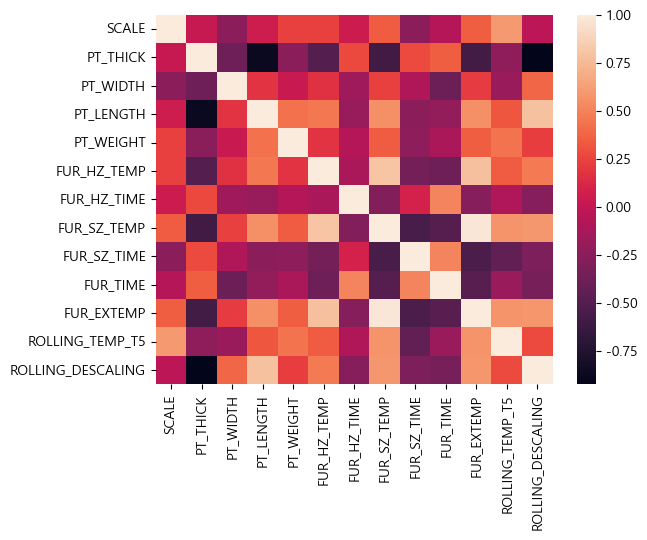

In [36]:
a=df1.corr(method='spearman').round(3)
sns.heatmap(a)

<span style="font-size:14px"> → SCALE과 상관있는 변수는</span> <span style="background:bisque;font-size:14px"> 'PT_WIDTH','PT_WEIGHT','ROLLING_TEMP_T5','FUR_HZ_TEMP','FUR_SZ_TEMP','FUR_SZ_TIME','FUR_EXTEMP'</span> <span style="font-size:14px">이다. 


<span style="font-size:14px"> - 범주형 변수를 라벨링하여 scale과 상관성을 갖는 변수를 확인한다. </span>

In [37]:
# 범주형 변수 컬럼 추출
f = df1.select_dtypes(include= "object")
f.columns

Index(['SPEC', 'STEEL_KIND', 'FUR_NO', 'FUR_NO_ROW', 'HSB', 'WORK_GR'], dtype='object')

In [38]:
df11=df1.copy()

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

co = ['SPEC', 'STEEL_KIND', 'FUR_NO', 'FUR_NO_ROW', 'HSB', 'WORK_GR']
for i in co:
    df11[i] = le.fit_transform(df11[i])
df11.head()

,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,7,4,32.25,3707,15109,14180,0,0,1144,116,1133,59,282,1125,934,1,8,1
1,0,7,4,32.25,3707,15109,14180,0,1,1144,122,1135,53,283,1120,937,1,8,1
2,0,62,8,33.27,3619,19181,18130,1,0,1129,116,1121,55,282,1106,889,1,8,2
3,0,62,8,33.27,3619,19181,18130,1,1,1152,125,1127,68,316,1113,885,1,8,2
4,0,17,8,38.33,3098,13334,12430,2,0,1140,134,1128,48,314,1118,873,1,8,0


In [40]:
df11.corr(method='spearman').round(3)

,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
SCALE,1.000,-0.019,-0.328,0.022,-0.242,0.050,0.240,0.051,-0.023,0.227,0.038,0.344,-0.249,-0.060,0.350,0.600,-0.319,-0.033,-0.005
SPEC,-0.019,1.000,-0.205,-0.184,-0.027,0.222,-0.028,0.008,-0.012,0.234,0.038,0.163,-0.102,0.024,0.162,0.041,-0.009,0.120,0.031
STEEL_KIND,-0.328,-0.205,1.000,0.731,-0.162,-0.738,-0.472,0.000,0.000,-0.487,0.224,-0.720,0.418,0.327,-0.719,-0.727,-0.011,-0.696,-0.013
PT_THICK,0.022,-0.184,0.731,1.000,-0.376,-0.869,-0.258,0.019,-0.002,-0.501,0.265,-0.592,0.271,0.348,-0.584,-0.228,0.019,-0.924,-0.023
PT_WIDTH,-0.242,-0.027,-0.162,-0.376,1.000,0.178,0.027,0.035,0.007,0.172,-0.166,0.235,-0.090,-0.392,0.216,-0.180,-0.049,0.378,-0.012
PT_LENGTH,0.050,0.222,-0.738,-0.869,0.178,1.000,0.425,0.048,-0.026,0.458,-0.191,0.553,-0.242,-0.213,0.550,0.322,-0.016,0.787,0.015
PT_WEIGHT,0.240,-0.028,-0.472,-0.258,0.027,0.425,1.000,0.087,-0.021,0.177,-0.061,0.345,-0.240,-0.106,0.347,0.434,0.015,0.223,0.061
FUR_NO,0.051,0.008,0.000,0.019,0.035,0.048,0.087,1.000,-0.005,0.038,0.068,0.054,-0.063,-0.027,0.049,0.013,-0.040,-0.037,-0.047
FUR_NO_ROW,-0.023,-0.012,0.000,-0.002,0.007,-0.026,-0.021,-0.005,1.000,-0.002,-0.019,0.018,0.094,0.017,0.021,-0.007,-0.021,0.020,0.073
FUR_HZ_TEMP,0.227,0.234,-0.487,-0.501,0.172,0.458,0.177,0.038,-0.002,1.000,-0.116,0.801,-0.350,-0.378,0.781,0.340,-0.031,0.462,-0.028


<span style="font-size:14px"> → SCALE과 상관있는 변수는</span> <span style="background:bisque;font-size:14px"> 'STEEL_KIND','HSB'</span> <span style="font-size:14px">이다. 

### 4. 데이터 전처리


In [50]:
df = pd.read_csv("C:/Users/osoomin/OneDrive - 숙명여자대학교/포스코/221026_Big Data 분석_실습화일/2. Big Data 분석/SCALE불량.csv", 
                 engine = "python", encoding='ansi')
# 필요하지 않은 컬럼 제거
# PLATE_NO는 ID이므로 분석에서 제외
df.drop(['PLATE_NO'],axis=1,inplace=True)

In [51]:
df

,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1열,1144,116,1133,59,282,1125,934,적용,8,2조
1,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2열,1144,122,1135,53,283,1120,937,적용,8,2조
2,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1열,1129,116,1121,55,282,1106,889,적용,8,3조
3,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2열,1152,125,1127,68,316,1113,885,적용,8,3조
4,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1열,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2021-08-04:21:24:11,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,1열,1172,72,1164,62,245,1155,1005,적용,8,2조
716,2021-08-04:21:31:21,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,1열,1150,61,1169,61,238,1160,947,적용,10,1조
717,2021-08-04:21:38:31,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,2열,1169,65,1163,77,247,1152,948,적용,10,4조
718,2021-08-04:21:45:41,양품,LR-A,C0,15.59,3363,48740,80240,3호기,2열,1179,86,1163,45,243,1154,940,적용,10,2조


<span style="font-size:18px"> 1) 이상치</span><br>
<span style="font-size:14px">- 압연공정에 대한 도메인 지식이 부족하기 때문에 이상치는 제거하지 않는다.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ROLLING_DATE       720 non-null    object 
 1   SCALE              720 non-null    object 
 2   SPEC               720 non-null    object 
 3   STEEL_KIND         720 non-null    object 
 4   PT_THICK           720 non-null    float64
 5   PT_WIDTH           720 non-null    int64  
 6   PT_LENGTH          720 non-null    int64  
 7   PT_WEIGHT          720 non-null    int64  
 8   FUR_NO             720 non-null    object 
 9   FUR_NO_ROW         720 non-null    object 
 10  FUR_HZ_TEMP        720 non-null    int64  
 11  FUR_HZ_TIME        720 non-null    int64  
 12  FUR_SZ_TEMP        720 non-null    int64  
 13  FUR_SZ_TIME        720 non-null    int64  
 14  FUR_TIME           720 non-null    int64  
 15  FUR_EXTEMP         720 non-null    int64  
 16  ROLLING_TEMP_T5    720 non

<span style="font-size:18px"> 2) 파생변수 <br> </span>

In [53]:
# 1. 강도를 나타내는 변수 추가
def ff(x):
  if x in ['T1','T8','C3','T3']:
  	return '고강도'
  if x in ['T5','T7','T0']:
	  return '중고강도'
  if x in ['C0', 'C1']:
	  return '중강도'
  
df['강도']=df['STEEL_KIND'].apply(ff)
  

In [54]:
# 2. 존재하는 변수로 만들 수 있는 파생변수 추가 (SCALE과 상관분석 후 상관성 존재하는 변수만 사용 예정)

df['hour']=df['ROLLING_DATE'].apply(lambda x:int(x[11:13]))
df.drop(['ROLLING_DATE'],axis=1,inplace=True)

df['가열로가열시간']=df['FUR_HZ_TIME']+df['FUR_TIME']

df['가열로가열대온도상승속도']=(df['FUR_HZ_TEMP']-df['ROLLING_TEMP_T5'])/df['FUR_HZ_TIME']

df['가열로균열시간비율']=df['FUR_SZ_TIME']/df['가열로가열시간']

df['가열로추출온도상승속도']=(df['FUR_EXTEMP']-df['FUR_SZ_TEMP'])/df['FUR_SZ_TIME']

col=['가열로가열시간','가열로가열대온도상승속도','가열로균열시간비율','가열로추출온도상승속도']
df[col] = round(df[col],3)


In [55]:
df.iloc[:,19:]

,강도,hour,가열로가열시간,가열로가열대온도상승속도,가열로균열시간비율,가열로추출온도상승속도
0,고강도,8,398,1.810,0.148,-0.136
1,고강도,8,405,1.697,0.131,-0.283
2,고강도,8,398,2.069,0.138,-0.273
3,고강도,8,441,2.136,0.154,-0.206
4,고강도,8,448,1.993,0.107,-0.208
...,...,...,...,...,...,...
715,중강도,21,317,2.319,0.196,-0.145
716,중강도,21,299,3.328,0.204,-0.148
717,중강도,21,312,3.400,0.247,-0.143
718,중강도,21,329,2.779,0.137,-0.200


<span style="font-size:14px"> <참고한 자료> <br> https://koreascience.kr/article/CFKO200810335360447.pdf <br> https://tb.kibo.or.kr/ktms/supplyTe/download.do?rbsIdx=110&idx=1020000080565&tag=2 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              720 non-null    object 
 1   SPEC               720 non-null    object 
 2   STEEL_KIND         720 non-null    object 
 3   PT_THICK           720 non-null    float64
 4   PT_WIDTH           720 non-null    int64  
 5   PT_LENGTH          720 non-null    int64  
 6   PT_WEIGHT          720 non-null    int64  
 7   FUR_NO             720 non-null    object 
 8   FUR_NO_ROW         720 non-null    object 
 9   FUR_HZ_TEMP        720 non-null    int64  
 10  FUR_HZ_TIME        720 non-null    int64  
 11  FUR_SZ_TEMP        720 non-null    int64  
 12  FUR_SZ_TIME        720 non-null    int64  
 13  FUR_TIME           720 non-null    int64  
 14  FUR_EXTEMP         720 non-null    int64  
 15  ROLLING_TEMP_T5    720 non-null    int64  
 16  HSB                720 non

<span style="font-size:18px"> 3) 분석용 데이터 생성</span> 

In [57]:
df['SCALE'] = df['SCALE'].map({'양품':0,'불량':1})

<span style="font-size:16px"> ▶ 1차 </span> <br> 
<span style="font-size:14px"> &nbsp;&nbsp;&nbsp; - 범주형은 LabelEncoder, 수치형은 그대로

In [58]:
# 범주형 변수 컬럼 추출
f = df.select_dtypes(include= "object")
f.columns

Index(['SPEC', 'STEEL_KIND', 'FUR_NO', 'FUR_NO_ROW', 'HSB', 'WORK_GR', '강도'], dtype='object')

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

co = ['SPEC', 'STEEL_KIND', 'FUR_NO', 'FUR_NO_ROW', 'HSB', 'WORK_GR', '강도']
for i in co:
    df[i] = le.fit_transform(df[i])
df[co]


,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR,강도
0,7,4,0,0,1,1,0
1,7,4,0,1,1,1,0
2,62,8,1,0,1,2,0
3,62,8,1,1,1,2,0
4,17,8,2,0,1,0,0
...,...,...,...,...,...,...,...
715,50,0,2,0,1,1,1
716,55,0,1,0,1,0,1
717,55,0,1,1,1,3,1
718,43,0,2,1,1,1,1


In [123]:
df.corr(method='spearman').round(3)

,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,...,HSB,ROLLING_DESCALING,WORK_GR,강도,hour,Plate단면적,가열로가열시간,가열로가열대온도상승속도,가열로균열시간비율,가열로추출온도상승속도
SCALE,1.000,-0.019,-0.328,0.022,-0.242,0.050,0.240,0.051,-0.023,0.227,...,-0.319,-0.033,-0.005,0.066,-0.318,-0.088,-0.021,-0.384,-0.279,-0.156
SPEC,-0.019,1.000,-0.205,-0.184,-0.027,0.222,-0.028,0.008,-0.012,0.234,...,-0.009,0.120,0.031,0.380,-0.012,-0.200,0.012,-0.033,-0.118,-0.081
STEEL_KIND,-0.328,-0.205,1.000,0.731,-0.162,-0.738,-0.472,0.000,0.000,-0.487,...,-0.011,-0.696,-0.013,-0.231,0.123,0.725,0.313,0.303,0.227,0.249
PT_THICK,0.022,-0.184,0.731,1.000,-0.376,-0.869,-0.258,0.019,-0.002,-0.501,...,0.019,-0.924,-0.023,-0.098,0.009,0.908,0.340,-0.097,0.040,0.159
PT_WIDTH,-0.242,-0.027,-0.162,-0.376,1.000,0.178,0.027,0.035,0.007,0.172,...,-0.049,0.378,-0.012,-0.118,0.199,-0.002,-0.347,0.288,0.181,-0.073
PT_LENGTH,0.050,0.222,-0.738,-0.869,0.178,1.000,0.425,0.048,-0.026,0.458,...,-0.016,0.787,0.015,0.126,-0.079,-0.872,-0.203,-0.027,-0.102,-0.128
PT_WEIGHT,0.240,-0.028,-0.472,-0.258,0.027,0.425,1.000,0.087,-0.021,0.177,...,0.015,0.223,0.061,0.140,-0.105,-0.285,-0.091,-0.234,-0.198,-0.118
FUR_NO,0.051,0.008,0.000,0.019,0.035,0.048,0.087,1.000,-0.005,0.038,...,-0.040,-0.037,-0.047,-0.012,-0.004,0.029,0.005,-0.034,-0.066,-0.050
FUR_NO_ROW,-0.023,-0.012,0.000,-0.002,0.007,-0.026,-0.021,-0.005,1.000,-0.002,...,-0.021,0.020,0.073,0.015,0.006,0.001,0.003,0.017,0.067,0.068
FUR_HZ_TEMP,0.227,0.234,-0.487,-0.501,0.172,0.458,0.177,0.038,-0.002,1.000,...,-0.031,0.462,-0.028,0.208,-0.247,-0.471,-0.325,0.071,-0.148,-0.239


<span style="font-size:14px"> → 파생변수 중 SCALE과 상관있는 변수는 </span> <span style="background:bisque;font-size:14px"> '가열로가열대온도상승속도','가열로균열시간비율', '가열로추출온도상승속도'</span> <span style="font-size:14px">이다. 

###  5. 모델링

<span style="background:palegoldenrod;font-size:18px"> 1) 로지스틱 회귀 </span> <br>
<span style="background:palegoldenrod;font-size:16px"> - 데이터 불균형 처리 </span> 

In [125]:
df_train, df_test = train_test_split(df,test_size = 0.3,random_state = 1234)

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (504, 26)
test data size : (216, 26)


In [126]:
# 목표변수 빈도 확인
print(df_train["SCALE"].value_counts(),"\n")
print("SCALE=1 비율  ", len(df_train[df_train["SCALE"]==1])/len(df_train['SCALE']))
print("SCALE=0 비율  ", len(df_train[df_train["SCALE"]==0])/len(df_train['SCALE']))

0    344
1    160
Name: SCALE, dtype: int64 

SCALE=1 비율   0.31746031746031744
SCALE=0 비율   0.6825396825396826


In [127]:
# Over-sampling 설정
sm = SMOTE(sampling_strategy='auto')

# train데이터를 이용한 Over-sampling
x_resampled, y_resampled = sm.fit_resample(df_train.drop('SCALE', axis=1), df_train['SCALE'])
# 결과 확인
print('Over-Sampling 전:\n',df_train['SCALE'].value_counts(),"\n")
print('Over-Sampling 후 Train X: {}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y: {} \n'.format(y_resampled.shape))

print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

Over-Sampling 전:
 0    344
1    160
Name: SCALE, dtype: int64 

Over-Sampling 후 Train X: (688, 25)
Over-Sampling 후 Train Y: (688,) 

Over-Sampling 후 '1':344
Over-Sampling 후 '0':344


In [128]:
# 데이터 결합 
df_a = pd.concat([x_resampled,y_resampled], axis=1)

# 목표변수 빈도 확인
print(df_a["SCALE"].value_counts(),"\n")
print("SCALE=1 비율  ", len(df_a[df_a["SCALE"]==1])/len(df_a['SCALE']))
print("SCALE=0 비율  ", len(df_a[df_a["SCALE"]==0])/len(df_a['SCALE']))

0    344
1    344
Name: SCALE, dtype: int64 

SCALE=1 비율   0.5
SCALE=0 비율   0.5


In [129]:
df_log = df_a.copy()

<span style="background:palegoldenrod;font-size:16px"> - 로지스틱 회귀 모델 </span> 

In [130]:
# 다 입력
import statsmodels.api as sm

log_model = sm.Logit.from_formula("""SCALE ~ SPEC + STEEL_KIND + PT_THICK + PT_WIDTH + PT_LENGTH + PT_WEIGHT + FUR_NO + FUR_NO_ROW + FUR_HZ_TEMP + 
FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 + HSB + ROLLING_DESCALING + WORK_GR + 강도 + hour + Plate단면적 + 
가열로가열시간 + 가열로가열대온도상승속도 + 가열로균열시간비율 + 가열로추출온도상승속도 """ ,df_log)

# 적합
log_result = log_model.fit()
# 결과 출력
print(log_result.summary())

         Current function value: 0.190388
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  688
Model:                          Logit   Df Residuals:                      662
Method:                           MLE   Df Model:                           25
Date:                Fri, 07 Apr 2023   Pseudo R-squ.:                  0.7253
Time:                        19:04:34   Log-Likelihood:                -130.99
converged:                      False   LL-Null:                       -476.89
Covariance Type:            nonrobust   LLR p-value:                7.156e-130
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -136.1233      1e+04     -0.014      0.989   -1.98e+04    1.95e+04
SPEC                 -0.0413      0.011     

In [131]:
# train, test 데이터 예측
y_pred_train = log_result.predict(df_log)
y_pred_test = log_result.predict(df_test)

# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)
y_pred_test_class = (y_pred_test > 0.5).astype(int)
# print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
# print("Test 예측 결과 \n", y_pred_test_class.head(),"\n")

print("Confusion Matrix for train: \n{}".format(confusion_matrix(df_log["SCALE"], y_pred_train_class)),"\n")
print("Confusion Matrix for test: \n{}".format(confusion_matrix(df_test["SCALE"],y_pred_test_class)),"\n")

Confusion Matrix for train: 
[[316  28]
 [ 29 315]] 

Confusion Matrix for test: 
[[119  26]
 [ 10  61]] 



<span style="font-size:14px"> ▶ Train에서 <br> • 실제 양품을 양품으로 분류 : 315건 <br> • 실제 불량을 양품으로 분류 : 28건 <br> • 실제 양품을 불량으로 분류 : 29건 <br> • 실제 불량을 불량으로 분류 : 310건</span> 
<br><br>
<span style="font-size:14px"> ▶ Test에서 <br> • 실제 양품을 양품으로 분류 : 119건 <br> • 실제 불량을 양품으로 분류 : 10건 <br> • 실제 양품을 불량으로 분류 : 26건 <br> • 실제 불량을 불량으로 분류 : 61건</span> 

In [132]:
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_log["SCALE"], y_pred_train_class)))
# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["SCALE"], y_pred_test_class)))

Train 예측/분류 결과
Accuracy: 0.917

Test 예측/분류 결과
Accuracy: 0.833



<AxesSubplot:>

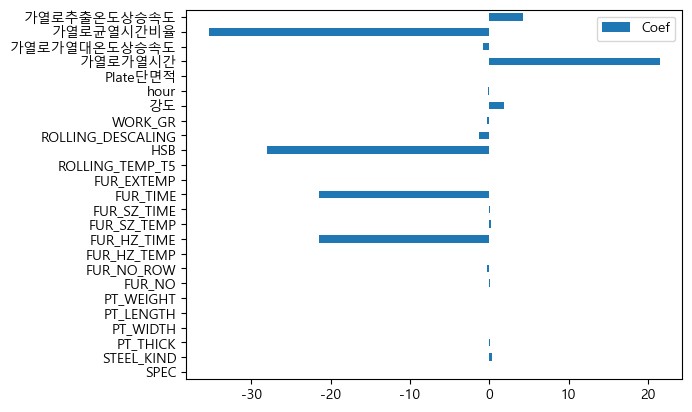

In [133]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")
# df_logistic_coef.plot.barh(y = "Coef", figsize=(10,6))

In [134]:
# 상관성 높은 변수 입력 (높은 일반화 성능을 위해 시행)

log_model = sm.Logit.from_formula("""SCALE ~ STEEL_KIND + PT_WIDTH + PT_WEIGHT + 
FUR_HZ_TEMP + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + 
ROLLING_TEMP_T5 + HSB + hour + 가열로가열대온도상승속도 + 가열로균열시간비율 + 가열로추출온도상승속도 """ ,df_log)

# 적합
log_result = log_model.fit()
# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.284209
         Iterations 22
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  688
Model:                          Logit   Df Residuals:                      673
Method:                           MLE   Df Model:                           14
Date:                Fri, 07 Apr 2023   Pseudo R-squ.:                  0.5900
Time:                        19:04:36   Log-Likelihood:                -195.54
converged:                       True   LL-Null:                       -476.89
Covariance Type:            nonrobust   LLR p-value:                4.560e-111
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -45.3932        nan        nan        nan         nan         nan
STEEL_KIND   

In [135]:
# train, test 데이터 예측
y_pred_train = log_result.predict(df_log)
y_pred_test = log_result.predict(df_test)

# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)
y_pred_test_class = (y_pred_test > 0.5).astype(int)
# print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
# print("Test 예측 결과 \n", y_pred_test_class.head(),"\n")

print("Confusion Matrix for train: \n{}".format(confusion_matrix(df_log["SCALE"], y_pred_train_class)),"\n")
print("Confusion Matrix for test: \n{}".format(confusion_matrix(df_test["SCALE"],y_pred_test_class)),"\n")

Confusion Matrix for train: 
[[308  36]
 [ 42 302]] 

Confusion Matrix for test: 
[[118  27]
 [ 10  61]] 



<span style="font-size:14px"> ▶ Train에서 <br> • 실제 양품을 양품으로 분류 : 308건 <br> • 실제 불량을 양품으로 분류 : 42건 <br> • 실제 양품을 불량으로 분류 : 36건 <br> • 실제 불량을 불량으로 분류 : 303건</span> 
<br><br>
<span style="font-size:14px"> ▶ Test에서 <br> • 실제 양품을 양품으로 분류 : 117건 <br> • 실제 불량을 양품으로 분류 : 10건 <br> • 실제 양품을 불량으로 분류 : 27건 <br> • 실제 불량을 불량으로 분류 : 61건 <br><br> ⇒ train 데이터의 예측 정확도는 감소했지만 test 데이터의 예측 정확도는 증가함.</span> 

In [ ]:
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_log["SCALE"], y_pred_train_class)))
# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["SCALE"], y_pred_test_class)))

Train 예측/분류 결과
Accuracy: 0.887

Test 예측/분류 결과
Accuracy: 0.829



<span style="font-size:14px"> • 오차가 0.084에서 0.058로 감소함.</span> 

<span style="background:palegoldenrod;font-size:18px"> 2) 랜덤 포레스트 </span> <br>
<span style="background:palegoldenrod;font-size:16px"> - 데이터 불균형 처리 </span> 

In [166]:
# 설명변수, 목표변수 데이터 구분
df_x = df.drop("SCALE", axis = 1, inplace = False)
df_y = df["SCALE"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (720, 25)
분할 후 설명변수 데이터 :Train (504, 25)   Test (216, 25)


In [167]:
# 목표변수 빈도 확인
print(df["SCALE"].value_counts(),"\n")
print("SCALE=1 비율  ", len(df[df["SCALE"]==1])/len(df['SCALE']))
print("SCALE=0 비율  ", len(df[df["SCALE"]==0])/len(df['SCALE']))

0    489
1    231
Name: SCALE, dtype: int64 

SCALE=1 비율   0.32083333333333336
SCALE=0 비율   0.6791666666666667


In [168]:
# 불균형 데이터이므로 사전처리 필요
from imblearn.over_sampling import SMOTE

# Over-sampling 설정
sm = SMOTE(sampling_strategy='auto')

# train데이터를 이용한 Over-sampling
x_resampled, y_resampled = sm.fit_resample(df_train_x,df_train_y)

# 결과 확인
print('Over-Sampling 전:\n',df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X: {}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y: {} \n'.format(y_resampled.shape))

print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

Over-Sampling 전:
 0    344
1    160
Name: SCALE, dtype: int64 

Over-Sampling 후 Train X: (688, 25)
Over-Sampling 후 Train Y: (688,) 

Over-Sampling 후 '1':344
Over-Sampling 후 '0':344


In [173]:
# 데이터 결합 
df_t = pd.concat([x_resampled,y_resampled], axis=1)

# 목표변수 빈도 확인
print(df_t["SCALE"].value_counts(),"\n")
print("SCALE=1 비율  ", len(df_t[df_t["SCALE"]==1])/len(df_t['SCALE']))
print("SCALE=0 비율  ", len(df_t[df_t["SCALE"]==0])/len(df_t['SCALE']))

0    344
1    344
Name: SCALE, dtype: int64 

SCALE=1 비율   0.5
SCALE=0 비율   0.5


In [174]:
df_t

,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,...,ROLLING_DESCALING,WORK_GR,강도,hour,Plate단면적,가열로가열시간,가열로가열대온도상승속도,가열로균열시간비율,가열로추출온도상승속도,SCALE
0,31,0,14.090000,3284,51234,93050,1,0,1142,75,...,10,0,1,19,46271.560000,428,3.053000,0.285000,-0.049000,0
1,19,8,38.430000,3129,16187,15280,2,0,1132,63,...,8,1,0,11,120247.470000,343,4.063000,0.318000,-0.119000,0
2,29,0,30.130000,2288,30730,33260,1,0,1153,74,...,8,0,1,8,68937.440000,359,1.797000,0.262000,-0.096000,1
3,19,8,65.640000,2498,11987,15430,2,1,1137,109,...,6,0,0,15,163968.720000,461,2.642000,0.158000,-0.068000,0
4,19,3,30.230000,1940,34797,16020,0,1,1119,130,...,8,3,2,9,58646.200000,454,1.485000,0.143000,-0.123000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,36,0,30.036422,2512,36004,90480,1,0,1159,129,...,7,2,1,2,75451.896134,438,1.235860,0.127198,-0.182738,1
684,48,0,17.685625,2938,38590,15237,1,0,1185,67,...,9,0,1,3,50259.645110,333,3.390000,0.173761,-0.196514,1
685,35,0,32.211742,2812,32452,42523,2,0,1172,87,...,6,1,1,15,83671.681274,343,1.805371,0.153163,-0.159463,1
686,41,0,14.965031,2530,51083,31000,0,0,1170,59,...,9,2,1,5,37852.466757,397,2.885990,0.175137,-0.116007,1


<AxesSubplot:>

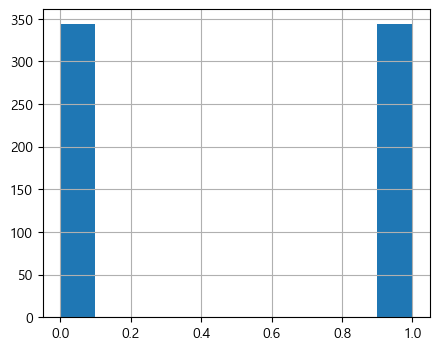

In [176]:
# 목표변수 산점도 확인
plt.figure(figsize=(5,4))
df_t['SCALE'].hist()

In [177]:
# 설명변수, 목표변수 데이터 구분
df_x = df_t.drop("SCALE", axis = 1, inplace = False)
df_y = df_t["SCALE"] 

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y,test_size = 0.3, random_state = 1234)

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_x, df_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (688, 25)
분할 후 설명변수 데이터 :Train (481, 25)   Test (207, 25)


In [178]:
# 랜덤 포레스트 모델 생성: RandomForestClassifier
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


<span style="font-size:14px"> → 해석 : 모델의 정확도는 train 100%, test 93.7%로 모델은 train에 과대적합함. 파라미터 조정을 통해 모델의 일반화 성능을 올린다. </span>

<span style="background:palegoldenrod;font-size:16px"> - 1) n_estimators 조정에 따른 정확도 변화 </span> 

In [192]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경: 1~150
para_n_tree = [n_tree * 5 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

# 모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,5,0.992,0.903
1,10,0.996,0.879
2,15,1.000,0.937
3,20,1.000,0.928
4,25,1.000,0.932
5,30,1.000,0.928
6,35,1.000,0.932
7,40,1.000,0.923
8,45,1.000,0.923
9,50,1.000,0.937


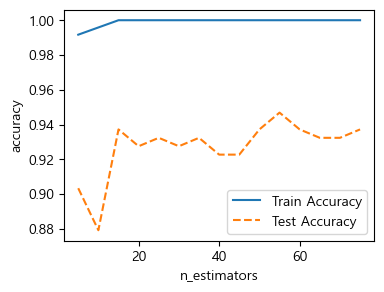

In [194]:
# 모델 정확도 그래프 확인
plt.figure(figsize=(4,3))
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

<span style="font-size:14px"> • 결정 트리 수 증가에 따라 모델의 정확도는 증가하다가 15부터 감소함.
모델의 특성을 고려해 15 선택함. -> n_estimators = 55 </span> 

<span style="background:palegoldenrod;font-size:16px"> - 2) max_depth 조정에 따른 정확도 변화 </span> 

In [240]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators=15, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.830,0.802
1,2,0.888,0.836
2,3,0.929,0.889
3,4,0.944,0.918
4,5,0.965,0.932
5,6,0.971,0.928
6,7,0.992,0.947
7,8,1.000,0.947
8,9,1.000,0.937
9,10,1.000,0.942


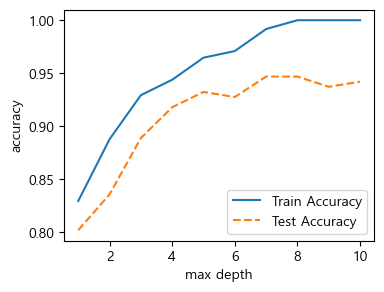

In [241]:
# 모델 정확도 그래프 확인
plt.figure(figsize=(4,3))
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

<span style="font-size:14px"> • 최대 깊이 증가에 따라 모델의 정확도는 증가하며 모델 특성과 파라미터 특성, train/test 모델의 성능 변화를 검토해 5 선택</span> 

<span style="background:palegoldenrod;font-size:16px"> - 3) min_samples_split 조정에 따른 정확도 변화 </span> 

In [242]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_split = [n_split * 5 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth=5,
                                n_estimators=15, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

# 테이블 결과
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,5,0.958,0.942
1,10,0.960,0.928
2,15,0.956,0.903
3,20,0.952,0.913
4,25,0.960,0.903
5,30,0.956,0.908
6,35,0.948,0.899
7,40,0.940,0.908
8,45,0.944,0.913
9,50,0.946,0.908


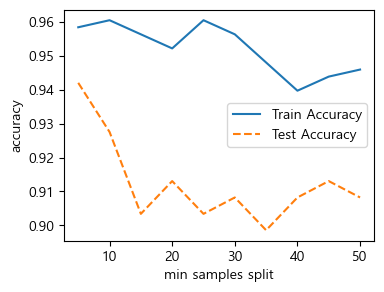

In [243]:
# 정확도를 그래프로 표현
plt.figure(figsize=(4,3))
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

<span style="font-size:14px"> • 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하며 train/test 모델의 성능 변화를 검토해 5 선택</span> 

<span style="background:palegoldenrod;font-size:16px"> - 4) min_samples_leaf 조정에 따른 정확도 변화 </span> 

In [250]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,min_samples_split =5,
                                max_depth=5,n_estimators=15,random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

# 테이블 결과
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.954,0.928
1,10,0.940,0.884
2,15,0.921,0.841
3,20,0.909,0.841
4,25,0.894,0.845
5,30,0.886,0.831
6,35,0.873,0.821
7,40,0.879,0.812
8,45,0.869,0.797
9,50,0.861,0.807


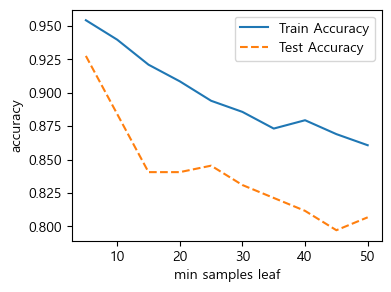

In [251]:
# 정확도를 그래프로 표현
plt.figure(figsize=(4,3))
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

<span style="font-size:14px"> • 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며 train/test 모델의 성능 변화를 검토해 5 선택</span> 

In [249]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf = 5,min_samples_split =5,max_depth=5,
                                  n_estimators=15,random_state=1234)
rf_final.fit(df_train_x, df_train_y)
# 평가
y_pred = rf_final.predict(df_test_x)

# train, test 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))

Accuracy on training set: 0.954
Accuracy on test set: 0.928



In [252]:
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Confusion matrix: 
[[99  4]
 [11 93]]


In [253]:
# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.900     0.961     0.930       103
           1      0.959     0.894     0.925       104

    accuracy                          0.928       207
   macro avg      0.929     0.928     0.927       207
weighted avg      0.930     0.928     0.927       207



<span style="font-size:14px"> ▶ Train 데이터 기준 정분류율는 95.4%이며 test 데이터 기준 정분류율은 92.8%로 일반화 성능이 개선됨. <br> - 실제 양품을 양품으로 분류 : 91건 <br> - 실제 불량을 불량으로 분류 : 88건 <br> - 실제 불량을 양품으로 분류 : 5건 <br> - 실제 양품을 불량으로 분류 : 20건  <br><br> ⇒ '1'기준 f1-score와 '0' 기준 f1-score는 약 92.5%로 비등함 </span> 

In [254]:
# 변수 중요도
v_feature_names = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
14,ROLLING_TEMP_T5,0.330
10,FUR_SZ_TEMP,0.110
15,HSB,0.084
16,ROLLING_DESCALING,0.070
23,가열로균열시간비율,0.067
13,FUR_EXTEMP,0.052
22,가열로가열대온도상승속도,0.048
1,STEEL_KIND,0.037
8,FUR_HZ_TEMP,0.026
20,Plate단면적,0.023


Text(0, 0.5, '설명변수')

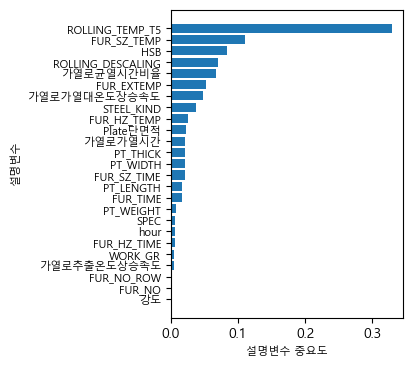

In [263]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
plt.figure(figsize=(3,4))
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"],fontsize=8)
plt.xlabel("설명변수 중요도",fontsize=8)
plt.ylabel("설명변수",fontsize=8)

<span style="font-size:14px"> • 가장 중요한 설명변수는 ROLLING_TEMP_T5이며 그 다음은 FUR_SZ_TEMP, HSB, ROLLING_DESCALING, 가열로 균열시간비율, FUR_EXTEMP 순이다.

<span style="background:palegoldenrod;font-size:18px"> 3) Gradient Boosting </span> <br>
<span style="background:palegoldenrod;font-size:16px"> - 데이터 분할 </span> 

In [264]:
#랜덤 포레스트 모델에서 전처리한 df_t를 재활용한다.

# 설명변수, 목표변수 데이터 구분
df_x = df_t.drop("SCALE", axis = 1, inplace = False)
df_y = df_t["SCALE"] 

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y,test_size = 0.3, random_state = 1234)

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_x, df_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (688, 25)
분할 후 설명변수 데이터 :Train (481, 25)   Test (207, 25)


In [265]:
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score (df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score (df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.981


<span style="font-size:14px"> -> 해석 : 모델의 정확도는 train 100%, test 98.1%로 모델은 train에 과대적합함. 파라미터 조정을 통해 모델의 일반화 성능을 올린다. 

<span style="background:palegoldenrod;font-size:16px"> - 1) learning_rate 조정에 따른 정확도 변화 </span> 

In [330]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_lr = [lr * 0.015 for lr in range(1, 20)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

# LearningRate별 정확도 테이블
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.015,0.956,0.942
1,0.030,0.979,0.957
2,0.045,0.992,0.966
3,0.060,0.994,0.971
4,0.075,0.998,0.976
5,0.090,1.000,0.981
6,0.105,1.000,0.981
7,0.120,1.000,0.981
8,0.135,1.000,0.981
9,0.150,1.000,0.995


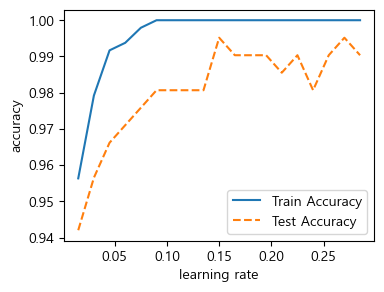

In [331]:
# LearningRate별 정확도 그래프로 확인
plt.figure(figsize=(4,3))
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

<span style="font-size:14px"> • 학습률이 증가하면 train 모델의 정확도는 지속적으로 증가하면서 1에 수렴하지만 test 모델의 정확도는 99.5% 수준에서 변동. train 모델의 과적합 방지를 고려하여 0.15 선택, 학습률 0.15에서 세밀한 변화 확인 필요

<span style="background:palegoldenrod;font-size:16px"> - 2) n_estimators 조정에 따른 정확도 변화 </span> 

In [336]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 3 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.15, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,3,0.929,0.913
1,6,0.938,0.913
2,9,0.948,0.932
3,12,0.969,0.947
4,15,0.969,0.957
5,18,0.977,0.952
6,21,0.981,0.957
7,24,0.988,0.966
8,27,0.992,0.966
9,30,0.992,0.971


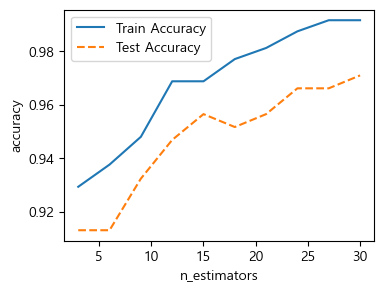

In [338]:
# 정확도를 그래프로 표현
plt.figure(figsize=(4,3))
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

<span style="font-size:14px"> • 결정트리 수 증가에 따라 모델의 정확도는 증가하며 train, test 모델의 정확도 변화를 고려하여 15 선택

<span style="background:palegoldenrod;font-size:16px"> - 3) max_depth 조정에 따른 정확도 변화 </span> 

In [339]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth, n_estimators=15, learning_rate=0.15, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

# max_depth별 정확도 테이블
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.896,0.845
1,2,0.940,0.928
2,3,0.969,0.957
3,4,0.988,0.952
4,5,0.998,0.966
5,6,0.998,0.961
6,7,1.000,0.947
7,8,1.000,0.976
8,9,1.000,0.957
9,10,1.000,0.957


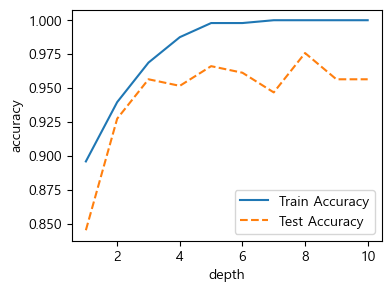

In [340]:
# 정확도를 그래프로 표현
plt.figure(figsize=(4,3))
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()

<span style="font-size:14px"> • 최대 깊이 증가에 따라 모델의 정확도는 증가하며 파라미터 특성과 train, test 모델의 정확도 변화를 고려하여 3 선택

<span style="background:palegoldenrod;font-size:16px"> - 4) min_samples_split 조정에 따른 정확도 변화 </span> 

In [354]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_split = [n_split*5 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                    max_depth=3, n_estimators=15, learning_rate=0.15, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

# min_samples_leaf별 정확도 테이블
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,5,0.969,0.957
1,10,0.969,0.957
2,15,0.969,0.957
3,20,0.969,0.957
4,25,0.973,0.957
5,30,0.973,0.957
6,35,0.969,0.952
7,40,0.969,0.952
8,45,0.969,0.952
9,50,0.969,0.952


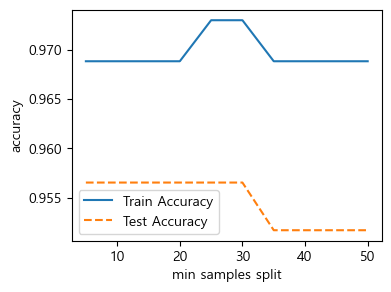

In [355]:
# 정확도를 그래프로 표현
plt.figure(figsize=(4,3))
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

<span style="font-size:14px"> • 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 증가하다 감소하여 97.3%에 수렴한다. train, test 모델의 성능 변화가 변하는 시점을 고려하여 25 선택

<span style="background:palegoldenrod;font-size:16px"> - 5) min_samples_leaf 조정에 따른 정확도 변화 </span> 

In [356]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 5 for n_leaf in range(1, 9)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,min_samples_split = 25,
                                    max_depth=3, n_estimators=15, learning_rate=0.15, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

# min_samples_leaf별 정확도 테이블
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.971,0.957
1,10,0.963,0.947
2,15,0.965,0.928
3,20,0.956,0.913
4,25,0.948,0.903
5,30,0.954,0.913
6,35,0.948,0.918
7,40,0.956,0.932


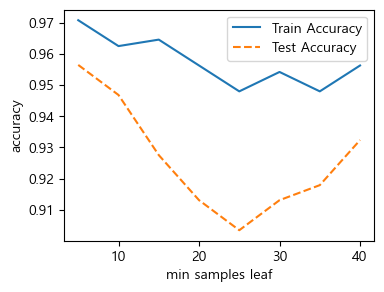

In [357]:
# 정확도를 그래프로 표현
plt.figure(figsize=(4,3))
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()

<span style="font-size:14px"> • 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며 train, test 모델의 성능 변화를 고려하여 10 선택

In [358]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf = 10,min_samples_split = 25,
                                    max_depth=3, n_estimators=15, learning_rate=0.15, random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))

Accuracy on training set: 0.963
Accuracy on test set: 0.947



In [361]:
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Confusion matrix: 
[[103   0]
 [ 11  93]]


In [362]:
# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.904     1.000     0.949       103
           1      1.000     0.894     0.944       104

    accuracy                          0.947       207
   macro avg      0.952     0.947     0.947       207
weighted avg      0.952     0.947     0.947       207



<span style="font-size:14px"> ▶ Train 데이터 기준 정분류율는 100%이며 test 데이터 기준 정분류율은 99.5로 일반화 성능이 개선됨. <br> - 실제 양품을 양품으로 분류 : 103건 <br> - 실제 불량을 불량으로 분류 : 93건 <br> - 실제 불량을 양품으로 분류 : 11건 <br> - 실제 양품을 불량으로 분류 : 93건  <br><br> ⇒ '1'기준 f1-score와 '0' 기준 f1-score는 94.4%로 비등함. </span> 

In [363]:
# 설명변수 중요도
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
14,ROLLING_TEMP_T5,0.656
15,HSB,0.183
10,FUR_SZ_TEMP,0.060
16,ROLLING_DESCALING,0.039
8,FUR_HZ_TEMP,0.029
2,PT_THICK,0.013
5,PT_WEIGHT,0.004
22,가열로가열대온도상승속도,0.004
17,WORK_GR,0.004
11,FUR_SZ_TIME,0.003


Text(0, 0.5, '설명변수')

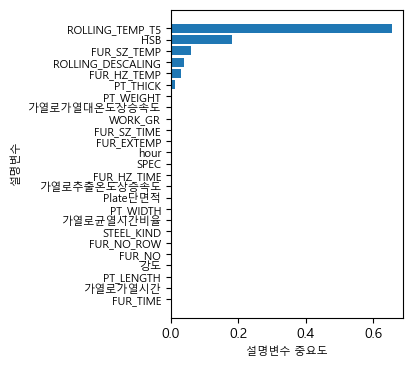

In [367]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
plt.figure(figsize=(3,4))
ax = fig.add_subplot(111)
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"],fontsize=8)
plt.xlabel("설명변수 중요도",fontsize=8)
plt.ylabel("설명변수",fontsize=8)

### 

###  6. 결과 보고 및 적용, 마무리
<span style="font-size:18px"> 1) 모델 선정 </span> 

<span style="font-size:15px"> 1. 로지스틱 회귀 </span> <br>
<span style="font-size:13px"> Train 예측/분류 결과 Accuracy: 0.887 <br> Test 예측/분류 결과 Accuracy: 0.829 </span> 

<span style="font-size:15px"> 2. 랜덤 포레스트 </span> <br>
<span style="font-size:13px"> Accuracy on training set: 0.954 <br> Accuracy on test set: 0.928 </span> 

<span style="font-size:15px"> 3. Gradient Boosting </span> <br>
<span style="font-size:13px"> Accuracy on training set: 0.963 <br> Accuracy on test set: 0.947 </span>

<br>
<span style="font-size:17px"> => 3. Gradient Boosting 으로 최종 모델 선정 </span> 

<span style="font-size:18px"> 2) 결정요인 & 기대효과 </span> <br><br>
<span style="font-size:13px"> "결정요인" <br> 정확도가 높은 모델인 RandomForest와 Gradient Boosting 모델에서 중요도가 높은 변수 순서대로 정렬하여 중복되는 변수 5개를 압연 공정 중 불량을 발생시키는 변수로 선정했다. 두 모델에서는 동일하게  압연 중 Descaling 횟수인 ROLLING_DESCALING, 압연 온도인 ROLLING_TEMP_T5, 가열로 균열대 온도인 FUR_SZ_TEMP, 1차 스케일 제거 여부인 HSB가 가장 중요하게 나타났다. <br><Br> "기대효과" <br> 프로젝트로 구축해본 "압연 공정에서의 불량품 분류 모델"의 활용으로 압연 공정 시 생산되는 불량품을 높은 정확도로 분류해내고, 공정 상의 오류를 파악하여 제거한다면 강판 생산의 최대화를 이끌 수 있다. 또한 이를 기반으로 구축되는 스마트 공장은 기하급수적으로 증가하는 생산량을 기대할 수 있도록 한다. </span> 